### In *new_controls*:  Change params structure and part of *"the core"*.

In [2]:
import json
import random
from IPython.display import HTML, SVG
import math

import attr_funcs

#### Edit the main functions and variables to control the picture

+ [edit controls.json](http://localhost:8888/edit/GitHub/GenPic/controls.json)

+ [edit attr_funcs.py](http://localhost:8888/edit/GitHub/GenPic/attr_funcs.py)

In [83]:
# Define the size and background oft the SVG picture

# SVG picture coordinates
p_width = 100
ratio = 1 / 1
p_height = math.floor(p_width * ratio)
# SVG picture output screen size
o_width = math.floor(p_width * 6)
o_height = math.floor(p_height * 6)

svg_header01 = """<?xml version="1.0" standalone="no"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink/" """

svg_box01 = 'width="{}px" height="{}px" viewBox="0 0 {} {}" version="1.2">'

svg_header02 = """<desc>Copyright  Jürgen Wendt, Hamburg 2018</desc>
  <!-- Show outline of canvas using 'rect' element -->"""

svg_box02 =  '<rect id="bg-00" x="0" y="0" width="{}" height="{}" fill="white"'
svg_box03 = ' opacity="1." stroke="white" stroke-opacity=".7" stroke-width=".01"/>'

svg_header = svg_header01 + svg_box01.format(o_width, o_height, p_width, p_height) + \
             svg_header02 + svg_box02.format(p_width, p_height) + svg_box03
#print(svg_header)

In [84]:
#  Load control data
controls = json.load(open('controls_grid.json', 'rt'))

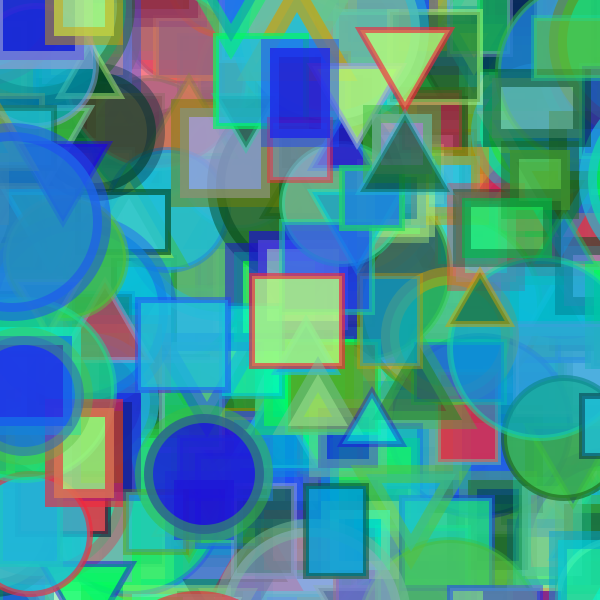

In [118]:
# Generate the figures for the picture and show the SVG picture
svg_figures = []
for i in range(1100):
    xmlplus = 'id="' + str(i+1) + '"'
    svg_figures.append (attr_funcs.generate_figure(controls, xmlplus=xmlplus))
text = svg_header + '\n'.join(svg_figures) + '\n</svg>\n'
SVG(text)

In [129]:
# Save the SVG picture as a file
f = open('tests/' + attr_funcs.timestamp() + '.svg', 'wt')
f.write(text)
f.close()

In [29]:
# Create a grid pattern
y_seq, x_seq, h, w = attr_funcs.get_grid(11,11)
h = w = min(h,w)
controls['x']['func'] = 'fifo_loop'
controls['x']['input'] = [list(x_seq)]
controls['y']['func'] = 'fifo_loop'
controls['y']['input'] = [list(y_seq)]
controls['height']['func'] = 'random_choice'
controls['height']['input'] = [[h, h]]
controls['width']['func'] = 'random_choice'
controls['width']['input'] = [[w, w]]

### RGB Colors by random

In [7]:
html5_header ="""<!DOCTYPE html>
<html><head>;
<style>
table, th, td {border: none; }
</style>
</head> <body> <table >"""

html5_td = '<td style="background-color:{};height:40px; width:40px">'

html5_tail = """</table> </body> </html>"""

In [104]:
controls['fill']['input'] = [[str(r) for r in rgb_list]]
controls['stroke']['input'] = [[str(r) for r in rgb_list]]

In [103]:
circles = []
rgb_list = []
for i in range(4):
    circles.append('<tr>')
    for j in range(5):
        rgb_list.append(attr_funcs.rgb2hex( random.randrange(0,255,30),
                                random.randrange(10,255,30),random.randrange(0,255,31)))
        s = html5_td.format(rgb_list[-1]) + rgb_list[-1] + '</td>'
        #s = '<td>' + circle.format(rgb_list[-1]) + '</td>'
        circles.append(s)
    circles.append('</tr>')
html_text = html5_header + '\n'.join(circles) + html5_tail


HTML(html_text)

#00FAD9,#1E641F,#1E82D9,#1E46F8,#B4FA7C
#96A0D9,#00FA5D,#00283E,#1E0AD9,#5ABE3E
#78BE9B,#D2A000,#1EDC9B,#00461F,#00A0D9
#1EBED9,#788200,#F0283E,#1EDC5D,#3CBE3E


### Change the order or patterns of the elements

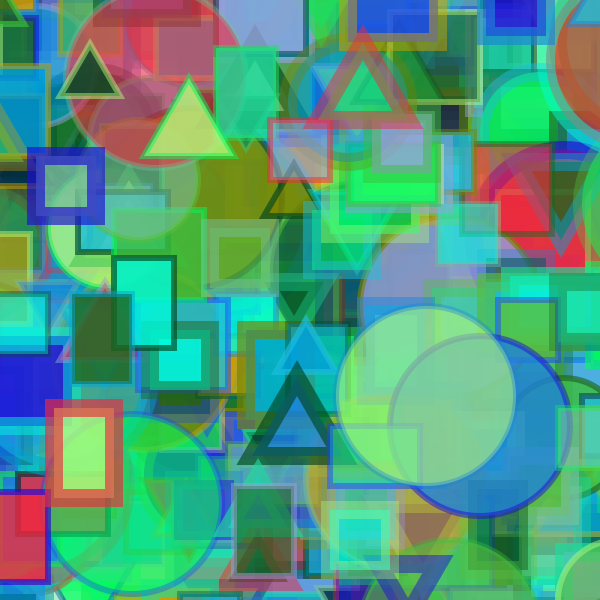

In [128]:
# change the order of the elements in the SVG picture and show the new picture
random.shuffle(svg_figures)

text = svg_header + '\n'.join(svg_figures) + '\n</svg>\n'
SVG(text)

In [137]:
a = b = min(12,3)

In [138]:
print(a, b)

3 3


## Sammler

In [ ]:
json.dump(controls, open('controls.json', 'wt'), indent=2, sort_keys=True)

In [117]:
controls = json.load(open('controls.json', 'rt'))

#### Transform old params to control

In [51]:
controls['shape'] = controls['figures']

In [48]:
for k,v in param_new.items():
    if v['func'] == 'rc': v['func'] = 'random_choice'
    elif v['func'] == 'ri': v['func'] = 'random_randint'
    print(k, v['input'])

width [[20, 40]]
y [[-20, 120]]
height [[20, 10]]
opacity [[0.6, 0.8]]
x [[-20, 120]]
stroke [['#FA23DC', '#AFD2A5', '#FAA0DC', '#32D237', '#C82300', '#AF2300', '#005537', '#19B9DC', '#7D876E', '#646E37', '#19EBA5', '#C83C00']]
figures [['line', 'line', 'rect', 'circle']]
stroke-opacity [[0.8, 0.99]]
transform [[-20, 120]]
stroke-width [[6, 4]]
fill [['#FA23DC', '#AFD2A5', '#FAA0DC', '#32D237', '#C82300', '#AF2300', '#005537', '#19B9DC', '#7D876E', '#646E37', '#19EBA5', '#C83C00']]


In [47]:
for k,v in param_new.items():
    if k in ('x', 'y', 'transform'):
        param_new[k]['input'] = [v['input']] 

In [32]:
params = {"transform":["ri",[-20,120]],"width":["rc",[[20,40]]],"stroke-width":["rc",[[6,4]]],
          "opacity":["rc",[[0.6,0.8]]],"columns":4,"figures":["rc",[["line","line","rect","circle"]]],
          "rows":4,"nr_of_figures":123,
          "palette":["#FA23DC","#AFD2A5","#FAA0DC","#32D237","#C82300","#AF2300","#005537",
                     "#19B9DC","#7D876E","#646E37","#19EBA5","#C83C00"],
          "y":["ri",[-20,120]],
          "stroke":["rc",[["#FA23DC","#AFD2A5","#FAA0DC","#32D237","#C82300","#AF2300",
                           "#005537","#19B9DC","#7D876E","#646E37","#19EBA5","#C83C00"]]],
          "height":["rc",[[20,10]]],"stroke-opacity":["rc",[[0.8,0.99]]],
          "structure":"RANDOM",
          "fill":["rc",[["#FA23DC","#AFD2A5","#FAA0DC","#32D237","#C82300","#AF2300",
                         "#005537","#19B9DC","#7D876E","#646E37","#19EBA5","#C83C00"]]]
          ,"x":["ri",[-20,120]]}

In [45]:
param_new = {}
for k, p in params.items():
    if type(p) == list and len(p) is 2:
        print(k)
        param_new[k] = {'func': p[0], 'input': p[1]}
for k,v in param_new.items():
    print(k, v)

y
x
fill
transform
width
height
opacity
stroke
figures
stroke-opacity
stroke-width
width {'func': 'rc', 'input': [[20, 40]]}
y {'func': 'ri', 'input': [-20, 120]}
height {'func': 'rc', 'input': [[20, 10]]}
opacity {'func': 'rc', 'input': [[0.6, 0.8]]}
x {'func': 'ri', 'input': [-20, 120]}
stroke {'func': 'rc', 'input': [['#FA23DC', '#AFD2A5', '#FAA0DC', '#32D237', '#C82300', '#AF2300', '#005537', '#19B9DC', '#7D876E', '#646E37', '#19EBA5', '#C83C00']]}
figures {'func': 'rc', 'input': [['line', 'line', 'rect', 'circle']]}
stroke-opacity {'func': 'rc', 'input': [[0.8, 0.99]]}
transform {'func': 'ri', 'input': [-20, 120]}
stroke-width {'func': 'rc', 'input': [[6, 4]]}
fill {'func': 'rc', 'input': [['#FA23DC', '#AFD2A5', '#FAA0DC', '#32D237', '#C82300', '#AF2300', '#005537', '#19B9DC', '#7D876E', '#646E37', '#19EBA5', '#C83C00']]}
